# Optimisation

Soit m $\in \mathbb{R^n}$ le malus appliqué pour chacune des n catégories.

Soit p $\in \mathbb{R^n}$ le prix moyen des véhicules de chacune des n catégories.

Soit $ \beta $ le coefficient de prix 

Dans le modèle logit, la part de marché d'un modèle i de prix est donnée par:
$ \frac{e^{\beta * p_{i}} }{ \sum_{k=1}^{n} e^{\beta * p_{k}}}$

Après malus, la nouvelle part de marché du modèle i est donc : 
$ \frac{e^{\beta * (p_{i}+m_{i})} }{ \sum_{k=1}^{n} e^{\beta * (p_{k}+m_{k})}}$

La fonction d'utilité choisie est : 

utilite(m)= $ \sum_{k=1}^{n} \frac{m_k}{p_k}$ * ( nouvelle part du marche du modele k) 

In [2]:
from scipy.optimize import minimize

La fonction de contrainte du malus vise à ce que les émissions moyennes de CO2 soient en dessous d'un certain seuil et est donc donnée par :

$\sum_{k=1}^{n}$ parts du marché du véhicule k x CO2 réel emis par le modele k

 ## 2. Test de la fonction avec un exemple

In [3]:
p

CO2bins
[65, 70)      40195.255814
[70, 75)      43757.571429
[75, 80)      47358.975904
[80, 85)      43688.634761
[85, 90)      49430.262436
                  ...     
[365, 370)    32251.400000
[375, 380)    81490.000000
[380, 385)    26418.000000
[390, 395)    57350.000000
[415, 420)    28492.000000
Name: prix, Length: 61, dtype: float64

In [4]:
CO2reel

CO2bins
[65, 70)       66.860664
[70, 75)       73.140486
[75, 80)       77.256956
[80, 85)       83.190575
[85, 90)       87.531718
                 ...    
[365, 370)    368.271053
[375, 380)    378.679310
[380, 385)    382.902075
[390, 395)    393.102239
[415, 420)    416.911847
Name: CO2reel, Length: 61, dtype: float64

In [12]:
pi = np.array([np.exp(beta*prix) for prix in p])/sum([np.exp(beta*prix) for prix in p])
pi

array([0.01710646, 0.0153726 , 0.01379829, 0.01540442, 0.01296697,
       0.01428728, 0.01498977, 0.0130281 , 0.01668362, 0.0138144 ,
       0.01429528, 0.01589539, 0.01561379, 0.0155341 , 0.01424433,
       0.01538857, 0.01510112, 0.01652732, 0.01615427, 0.01534722,
       0.01556109, 0.01589099, 0.01694365, 0.01744278, 0.01775955,
       0.01735428, 0.01507376, 0.01767564, 0.01613979, 0.01862397,
       0.01684756, 0.01961845, 0.01998339, 0.01064605, 0.02115216,
       0.01185657, 0.01814497, 0.01829802, 0.01085168, 0.01935498,
       0.01135677, 0.0230848 , 0.00981737, 0.0296732 , 0.02101872,
       0.0255036 , 0.01778266, 0.01192412, 0.01885001, 0.01958335,
       0.01315088, 0.01031102, 0.02845164, 0.0162529 , 0.01449195,
       0.00491971, 0.02170997, 0.00495607, 0.02586197, 0.01022477,
       0.02430188])

In [13]:
# Fonction d'utilité
def utility_function(m):
    pexp = np.exp(beta*(p+m))
    pit = pexp/np.sum(pexp)
    return(-np.sum(m*pit/p))

In [14]:
# Fonction de contrainte
def constraint_function(m):
    pexp = np.exp(beta*(p+m))
    pit = pexp/np.sum(pexp)
    return(np.sum(pit*CO2reel))

In [15]:
utility_function(m_guess)

-0.0

In [16]:
constraint_function(m_guess)

225.89980646106568

In [17]:
# valeurs exemples de variables clés de l'optimisation
beta = -0.00003 # valeur d'Etienne : -0.01414

# vecteur prix par catégorie p

# vecteur CO2estimé par catégorie CO2reel

# le malus inital
m_guess = np.zeros(61)

#le seuil a pas depasser
seuil = 200

In [18]:
bounds = [(0, None)] * 61
constraint = {'type': 'ineq', 'fun': lambda m : seuil - constraint_function(m)}
result = minimize(utility_function, m_guess, constraints=constraint, bounds=bounds)

print(result.x) # valeur des malus obtenus pour atteindre l'optimum
print(result.fun) #valeur de la fonction minimisée à l'optimum. 

[0.00000000e+00 0.00000000e+00 1.04080543e-16 9.89107187e-17
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 7.93615956e-17 9.88749649e-17 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.23717253e-17 0.00000000e+00 1.52076968e+00
 2.58866361e-17 3.46792377e-18 0.00000000e+00 4.10402108e+00
 3.00736136e+00 4.41197367e+00 1.08451233e+00 1.63573630e+02
 6.84685647e+01 4.28664760e+02 1.54584200e+02 6.93755890e+02
 5.85411091e+02 1.18650747e+03 7.77744096e+02 1.20853173e+03
 2.71433725e+03 2.97677492e+03 3.88488807e+03 3.96833062e+03
 6.31593234e+03 7.57644542e+03 6.03921796e+03 9.37614981e+03
 7.83892235e+03 1.49552660e+04 7.20756284e+03 2.23275276e+04
 1.59424687e+04 2.13382171e+04 1.55822921e+04 1.18863425e+04
 1.86381762e+04 2.19673510e+04 1.89027609e+04 1.47653589e+04
 4.03023868e+04 2.43875226e+04 2.34003592e+04 8.64273766e+03
 3.56291582e+04 1.02634273e+04 4.53335664e+04 2.13316189e+04
 5.18921087e+04]
-0.1716567889804955


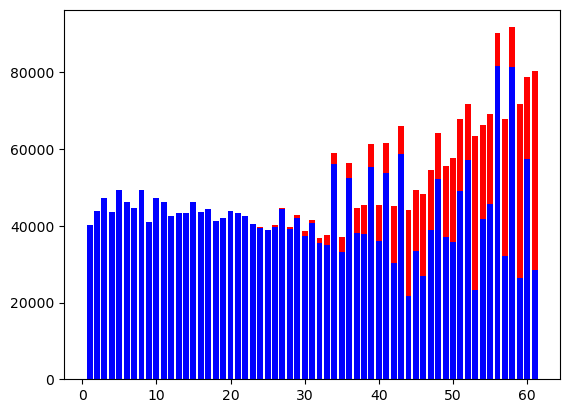

In [19]:
plt.bar(np.linspace(1,61,61), (p+result.x), color = 'red')
plt.bar(np.linspace(1,61,61), p, color = 'blue')
plt.show()

On obtient bien les malus à appliquer pour optimiser l'utilité des consommateurs sous contrainte de rester sous un certain seuil moyen d'émissions (avec le prix en ordonnée et les catégories de taxation, de 1 à 61 en abscisse)